In [15]:
import numpy as np
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = False
from matplotlib import cm, colors
from matplotlib.patches import Ellipse
import matplotlib as mpl

from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import SphericalCircle
import math

from scipy.ndimage import gaussian_filter1d

In [16]:
h = 1
H0 = 100*h
c = 299792

In [17]:
SGA = Table.read('/global/cfs/cdirs/cosmo/data/sga/2020/SGA-2020.fits', 'ELLIPSE')
SGA[:10]

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32
2,SGA-2020 2,PGC1283207,1283207,228.3770865,5.4232017,S?,152.2,0.36307806,0.724436,0.03463229,23.40448,16.976,False,LEDA-20181114,0,PGC1283207,1,True,228.3770865,5.4232017,0.36307806,2283p055,228.3770803831908,5.423191398593787,0.49470574,SB26,158.20142,0.545691,228.37700918822188,5.4232652570544015,10.897086,3.3509698,3.1147978,3.240862,5.902337,6.9126143,7.941369,8.997992,10.073601,11.199986,12.391357,13.561038,14.841172,16.966799,16.108246,15.486356,16.879545,16.024958,15.400715,16.818878,15.967034,15.341793,16.776297,15.925804,15.300776,16.746685,15.897334,15.272053,16.725166,15.876816,15.2521105,16.708357,15.862035,15.237181,16.696539,15.851936,15.226998,16.689613,15.844313,15.21976,0.013392451,0.02354,0.021872982,0.01736985,0.024445537,0.039866067,0.05026544,0.08455789,0.122911856,0.005682776,0.0054258136,0.0049038026,0.005588406,0.005323561,0.0047632363,0.00543534,0.005177031,0.0046343105,0.0053025587,0.005040888,0.0045181247,0.005206092,0.0049438984,0.0044374703,0.0051483097,0.0048758644,0.0043834248,0.0051032505,0.0048264163,0.004344248,0.0050705094,0.004792021,0.004319857,0.005054293,0.004765629,0.0043044444,16.65942,0.34037337,0.2978292,3.0239506,0.07928849,15.820566,0.2640441,0.34559453,3.3033552,0.003811298,15.195567,0.29826432,0.3001073,3.2333765,0.011723555,0
3,SGA-2020 3,PGC1310416,1310416,202.54443750000002,6.9345944,Sc,159.26,0.4017908,0.7816278,0.073888786,23.498482,16.85,False,LEDA-20181114,1,PGC1310416,1,True,202.54443750000002,6.9345944,0.4017908,

In [18]:
boolean = SGA['Z_LEDA'] < 0
SGA['Z_LEDA'][boolean] = np.nan
print(np.sum(np.isnan(SGA['Z_LEDA'])))
print(np.sum(np.isfinite(SGA['Z_LEDA'])))

118903
264715


In [19]:
d = (SGA['Z_LEDA']*c)/H0
dist = d * (1000000)
print(np.sum(np.isfinite(d)))

264715


In [20]:
inside_log = dist/(10.0)
print(inside_log)

      Z_LEDA      
------------------
10382483.976781368
22151266.973614693
22687064.341425896
30251452.464699745
22812766.025066376
 25075961.43758297
 9133385.897487402
 6709189.717203378
  52992217.6053524
 39375238.80267143
               ...
                --
                --
                --
                --
                --
                --
                --
                --
                --
                --
                --
Length = 383620 rows


In [24]:
boolean = SGA['R_MAG_SB26'] < 0
SGA['R_MAG_SB26'][boolean] = np.nan
print(np.sum(np.isnan(SGA['R_MAG_SB26'])))

20831


In [25]:
r_abs_SB26 = SGA['R_MAG_SB26'] - (5*((np.log10(inside_log))))
print(r_abs_SB26)
r_abs_SB26.info('stats')

       Z_LEDA      
-------------------
-19.237193679846527
-20.953530561306877
-19.401799152173865
 -21.37248687851904
-21.161220541751213
 -19.63086857867726
                nan
  -19.6759662539437
-21.630793670792244
-21.075013937518783
                ...
                 --
                 --
                 --
                 --
                 --
                 --
                 --
                 --
                 --
                 --
                 --
Length = 383620 rows
name = Z_LEDA
mean = -20.1744
std = 1.39832
min = -28.9338
max = -1.99899
n_bad = 118906
length = 383620


/tmp/ipykernel_191325/3980598963.py:1: RuntimeWarning: divide by zero encountered in log10
  r_abs_SB26 = SGA['R_MAG_SB26'] - (5*((np.log10(inside_log))))


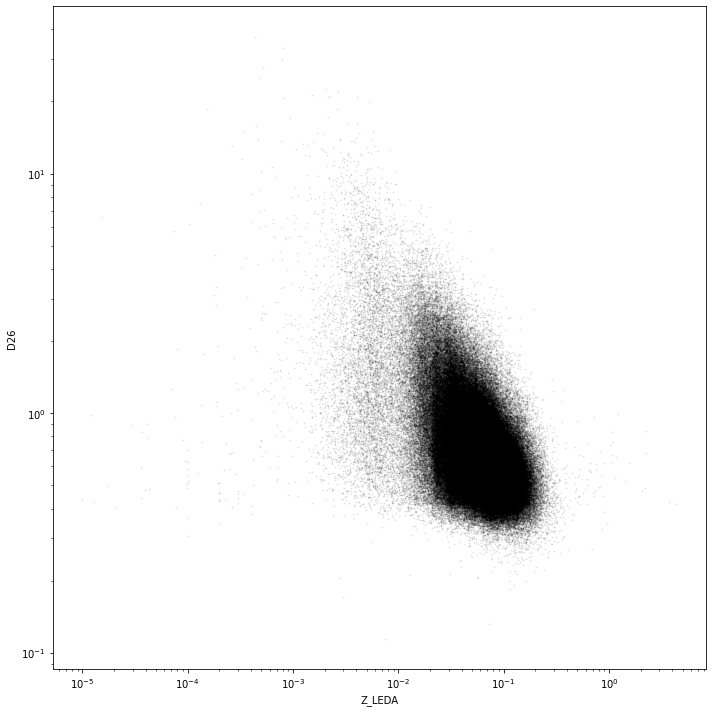

In [26]:
plt.figure(figsize=(10,10), tight_layout=True)
plt.loglog(SGA['Z_LEDA'], SGA['D26'], 'ko', markersize=0.7 , alpha=0.1)
plt.xlabel('Z_LEDA')
plt.ylabel('D26');

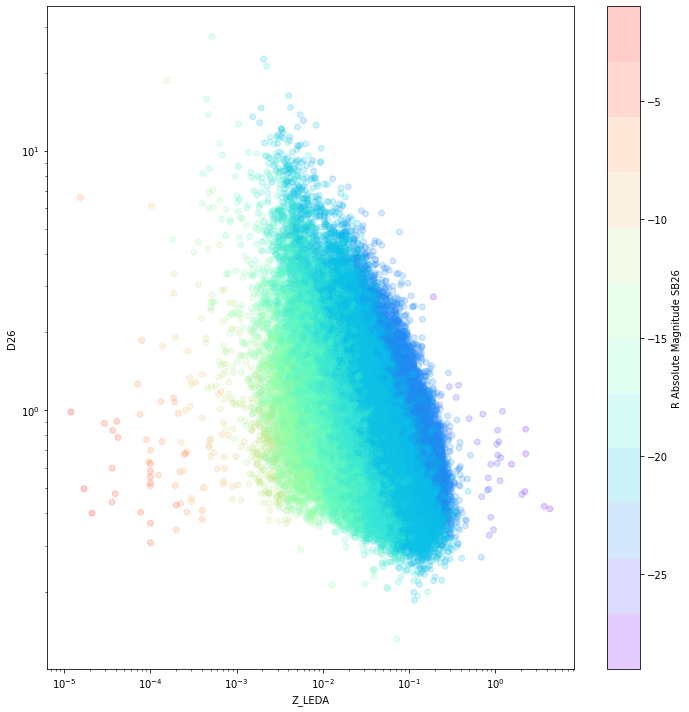

In [30]:
plt.figure(figsize=(10,10), tight_layout=True)
plt.scatter(x=SGA['Z_LEDA'], y=SGA['D26'], alpha = 0.2, c=r_abs_SB26, vmin=-29, vmax=-1, cmap= plt.cm.get_cmap('rainbow', 12))
plt.xlabel('Z_LEDA')
plt.ylabel('D26');
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='R Absolute Magnitude SB26');

/tmp/ipykernel_191325/3377851772.py:9: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(x), np.log10(y), z, alpha = 0.2, c = r_abs_SB26, vmin= -29, vmax=-1, cmap= plt.cm.get_cmap('rainbow'))


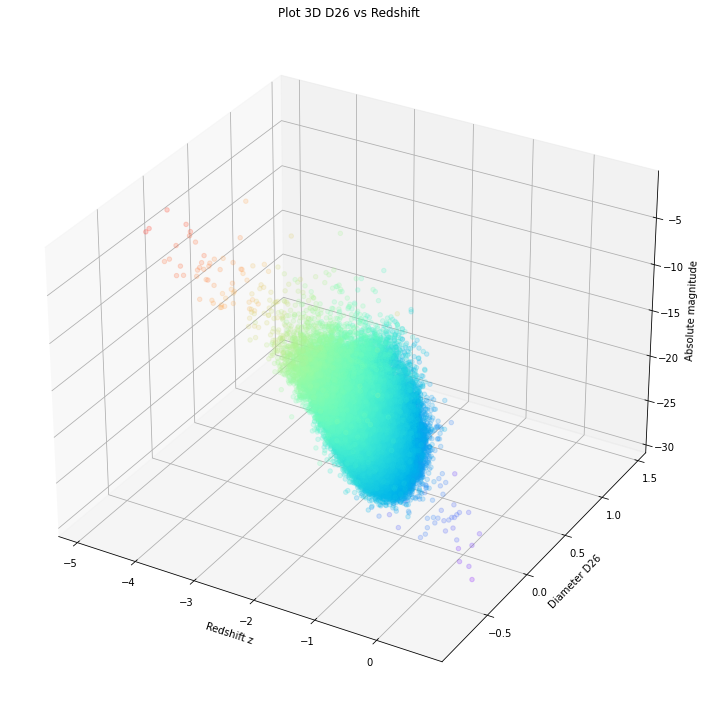

In [33]:
plt.figure(figsize=(10,10), tight_layout=True)
ax = plt.axes(projection ='3d')
ax.set_xlabel('Redshift z')
ax.set_ylabel('Diameter D26')
ax.set_zlabel('Absolute magnitude')
z = r_abs_SB26
x = SGA['Z_LEDA']
y = SGA['D26']
ax.scatter(np.log10(x), np.log10(y), z, alpha = 0.2, c = r_abs_SB26, vmin= -29, vmax=-1, cmap= plt.cm.get_cmap('rainbow'))
ax.set_title('Plot 3D D26 vs Redshift')
plt.show()

In [29]:
SGA['R_ABSMAG_SB26'] = r_abs_SB26
SGA[r_abs_SB26 < -25]

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT,R_ABSMAG_SB26
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float64
17092,SGA-2020 17092,2MASXJ17005493+3334077,3412140,255.228885,33.5689845,Sbc,117.18,0.5152286,0.42461956,0.13508844,24.978481,17.79,False,LEDA-20181114,4548,2MASXJ17005493+3334077,1,True,255.228885,33.5689845,0.5152286,2551p335,255.22893923645555,33.56898207043469,0.54708934,SB26,115.00249,0.6343365,255.22885189102544,33.569054847997705,15.59392,9.27405,4.5337214,5.553361,-1.0,-1.0,-1.0,-1.0,10.851251,12.528021,13.17914,14.664867,16.41268,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,13.44334,12.159322,16.2932,13.22033,12.05986,16.247355,13.214159,12.033256,16.239025,13.121222,12.009991,16.216665,13.117693,12.01725,16.198936,-1.0,-1.0,-1.0,-1.0,2.2535565,0.97478133,0.7726221,0.47441325,0.18908395,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.06794748,0.026052348,0.020753948,0.060566153,0.02576686,0.020177051,0.060421634,0.025639916,0.02003888,0.057241403,0.025475822,0.01974615,0.057166994,0.025525007,0.019477515,13.092885,0.49277827,1.979567,7.95499,0.28293207,12.013576,0.018154236,69586.7,38.309196,0.04970078,16.145544,250.57872,0.0007176678,2.4362845,0.018244121,0,-26.019941128985053
34619,SGA-2020 34619,PGC1169952,1169952,321.14387849999997,0.5888342,Sab,159.1,0.38282475,0.67608297,0.61973536,23.95948,17.416,False,LEDA-20181114,9275,PGC1169952,1,True,321.14387849999997,0.5888342,0.38282475,3211p005,321.14386847627316,0.5888571096745755,0.7541653,SB26,154.095,0.571982,321.1437956755792,0.5888696318258799,12.445758,